<a href="https://colab.research.google.com/github/sakshiharde/Sms_Spam_Classifier/blob/main/Spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sms_data=pd.read_csv('/content/drive/MyDrive/content/spam.csv',encoding='latin-1')

In [4]:
sms_data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
943,ham,And also I've sorta blown him off a couple tim...,NaN,NaN,NaN
4214,ham,No dear i was sleeping :-P,NaN,NaN,NaN
4196,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,NaN,NaN,NaN
2084,ham,How are you. Wish you a great semester,NaN,NaN,NaN
2944,ham,"Hey babe, sorry i didn't get sooner. Gary can ...",NaN,NaN,NaN


In [5]:
sms_data.shape

(5572, 5)

In [6]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

# 1.Data Cleaning

In [7]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 cols
sms_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
sms_data.sample(5)

,v1,v2
4918,ham,Re your call; You didn't see my facebook huh?
3170,ham,Still otside le..u come 2morrow maga..
896,ham,Hope you are having a good week. Just checking in
4011,ham,Discussed with your mother ah?
5091,ham,No no. I will check all rooms befor activities


In [10]:
sms_data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
sms_data.sample(5)

,target,text
4541,spam,FreeMsg Hi baby wow just got a new cam moby. W...
853,ham,\AH POOR BABY!HOPE URFEELING BETTERSN LUV! PRO...
4189,ham,"Sorry, I'll call later"
4197,spam,Want to funk up ur fone with a weekly new tone...
4767,ham,I'm not sure if its still available though


In [12]:
#applying label encoder for ham and spam
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
sms_data['target']=encoder.fit_transform(sms_data['target'])

In [14]:
sms_data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#checking missing values
sms_data.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
sms_data.duplicated().sum()

403

In [17]:
sms_data=sms_data.drop_duplicates(keep='first')

In [18]:
sms_data.duplicated().sum()

0

In [19]:
sms_data.shape

(5169, 2)

# 2.Exploratory Data Analysis

In [20]:
sms_data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

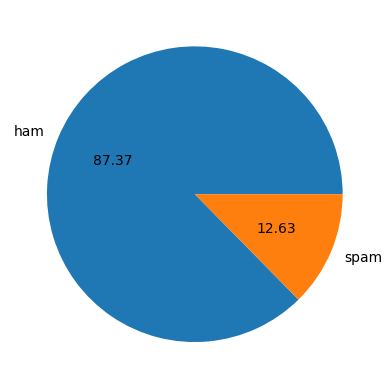

In [21]:
import matplotlib.pyplot as plt
plt.pie(sms_data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
#Data is imbalance


In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
#number of characters
sms_data['num_characters']=sms_data['text'].apply(len)

In [25]:
sms_data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#number of words
sms_data['num_words']=sms_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
sms_data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
sms_data['num_sentences']=sms_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
sms_data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
sms_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#describing ham messages
sms_data[sms_data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#describing spam messages
sms_data[sms_data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

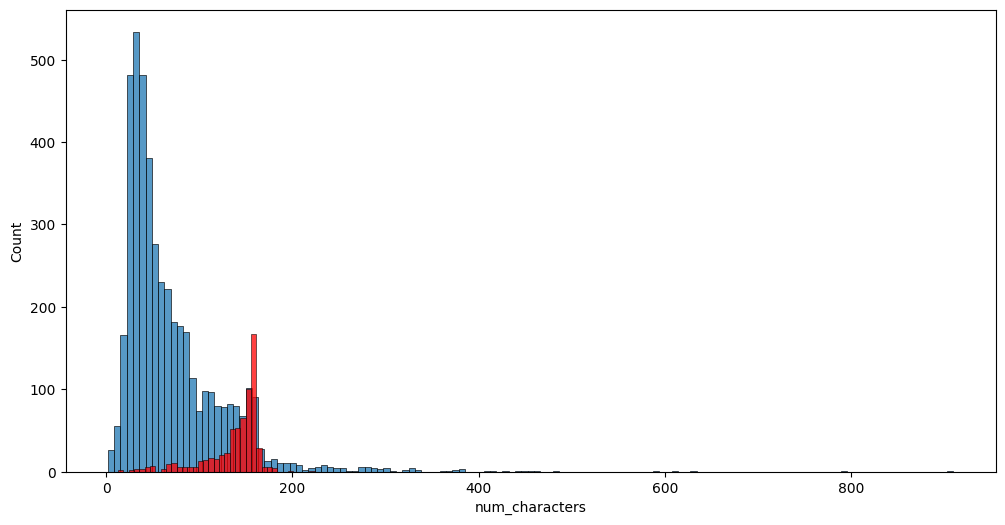

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data['target']==0]['num_characters'])
sns.histplot(sms_data[sms_data['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

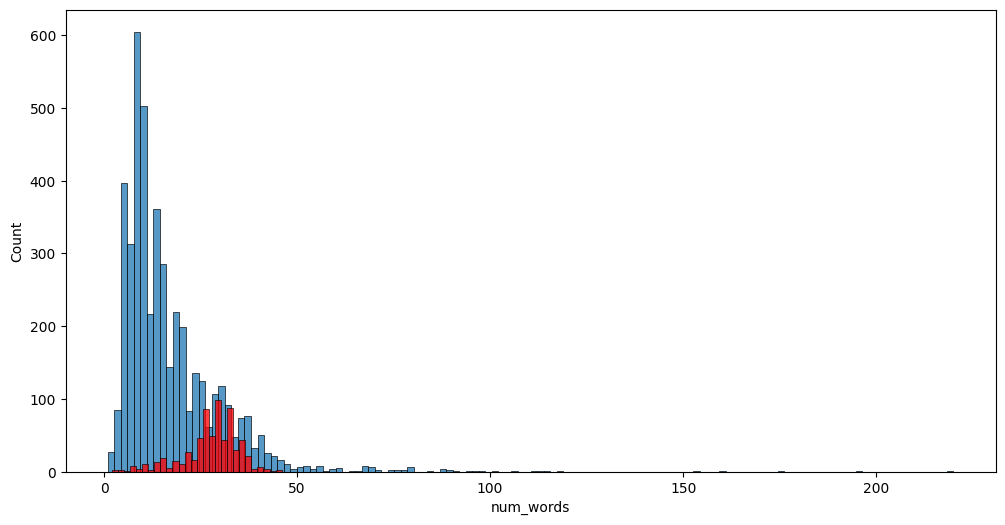

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data['target']==0]['num_words'])
sns.histplot(sms_data[sms_data['target']==1]['num_words'],color='red')

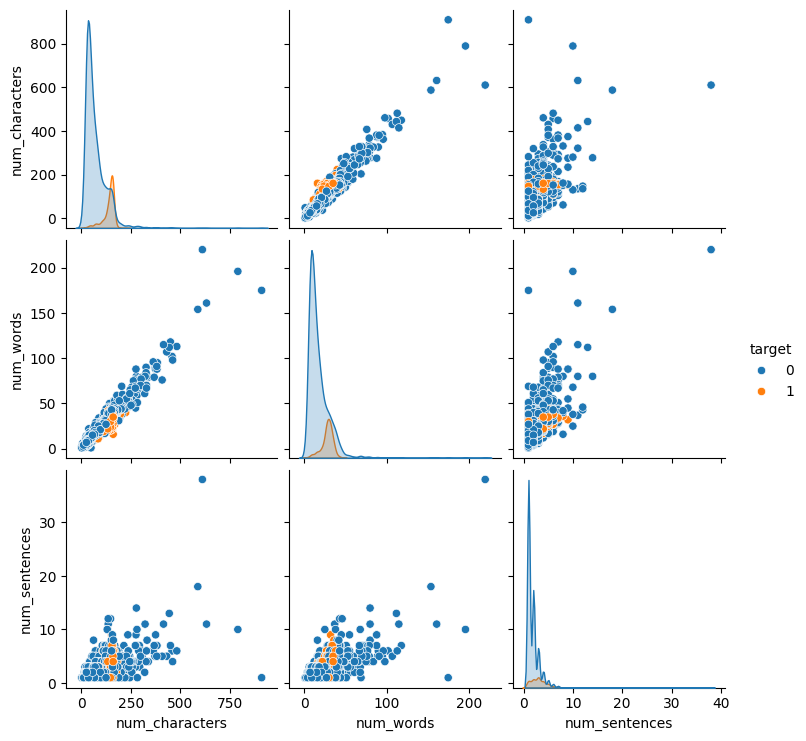

In [36]:
#lets see the relation between the columns num_words,num_characters and num_sentences
sns.pairplot(sms_data,hue='target')

<Axes: >

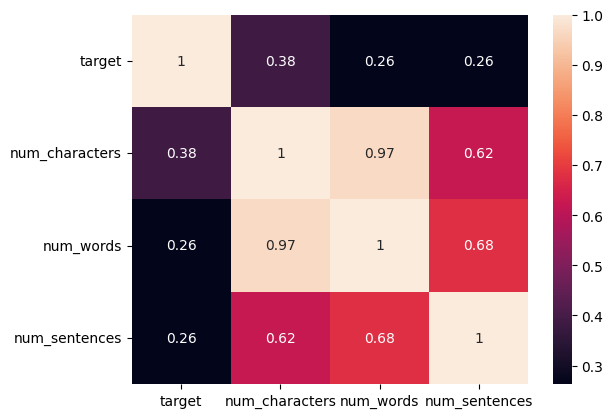

In [37]:
#correlation
sns.heatmap((sms_data[['target','num_characters','num_words','num_sentences']]).corr(),annot=True)

# 3.Data Preprocessing



*   Lower Case

*   Tokenization
*   Removing special characters


*   Removing stop words and punctuation

*   Stemming






In [38]:
# function for lower case and tokenizing the text
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
import string

In [44]:
transform_text('Hi how are you sakshi')

'hi sakshi'

In [43]:
sms_data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [45]:
sms_data['transformed_text']=sms_data['text'].apply(transform_text)

In [46]:
sms_data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wc=wc.generate(sms_data[sms_data['target']==1]['transformed_text'].str.cat(sep=" "))

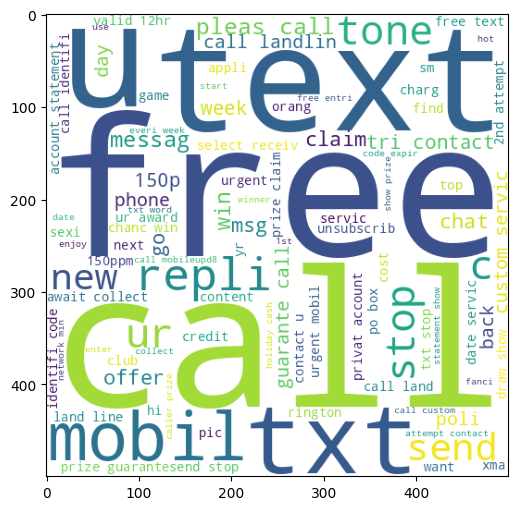

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
ham_wc=wc.generate(sms_data[sms_data['target']==0]['transformed_text'].str.cat(sep=" "))

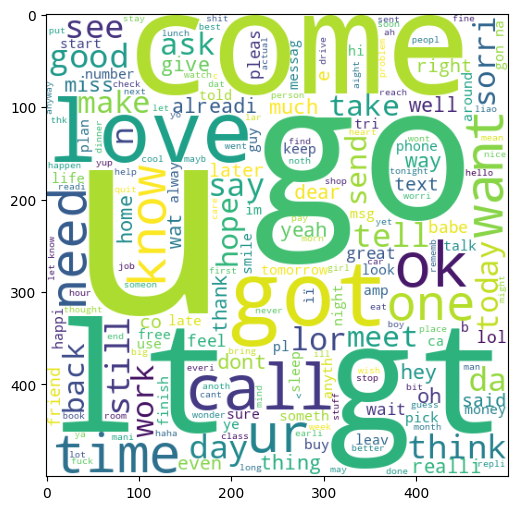

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
spam_corpus=[]
for msg in sms_data[sms_data['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [53]:
len(spam_corpus)

9939

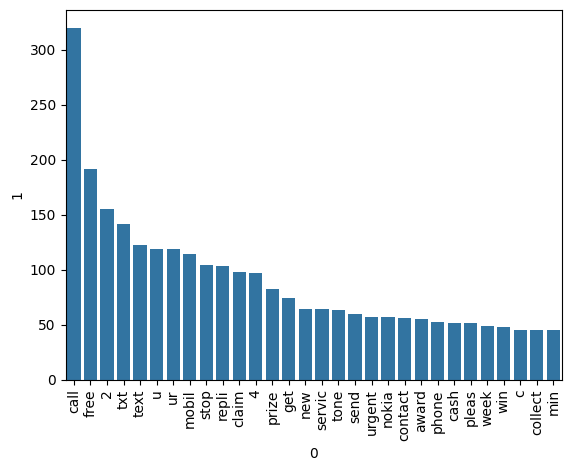

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus=[]
for msg in sms_data[sms_data['target']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [56]:
len(ham_corpus)

35404

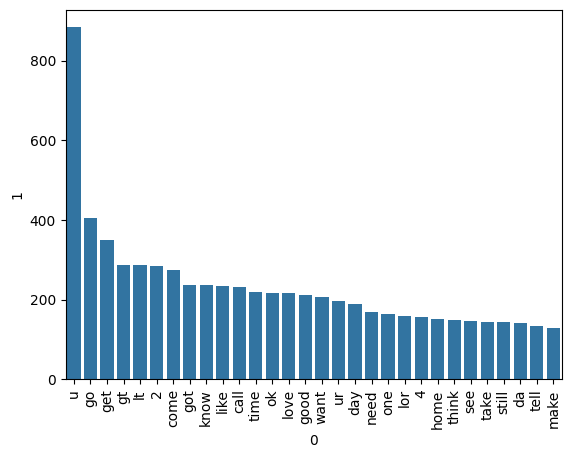

In [57]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [58]:
#using naive bayes algorithm because naive bayes works well on textual data
#text vectorization
#Using bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [59]:
X=tfidf.fit_transform(sms_data['transformed_text']).toarray()

In [60]:
X.shape

(5169, 3000)

In [61]:
y=sms_data['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split


In [64]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [68]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [70]:
#tfidf --> MVB

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs={
    'SVC':svc,
    'KNN':knc,
    'MNB':mnb,
    'DTC':dtc,
    'LR':lrc,
    'RFC':rfc,
    'Adaboost':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [78]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [79]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision= train_classifier(clf,X_train,y_train,X_test,y_test)

  print('For',name)
  print('Accuracy-',current_accuracy)
  print('Precision-',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy- 0.9758220502901354
Precision- 0.9747899159663865
For KNN
Accuracy- 0.9052224371373307
Precision- 1.0
For MNB
Accuracy- 0.9709864603481625
Precision- 1.0
For DTC
Accuracy- 0.9274661508704062
Precision- 0.8118811881188119
For LR
Accuracy- 0.9584139264990329
Precision- 0.9702970297029703
For RFC
Accuracy- 0.9758220502901354
Precision- 0.9829059829059829
For Adaboost
Accuracy- 0.960348162475822
Precision- 0.9292035398230089
For BC
Accuracy- 0.9584139264990329
Precision- 0.8682170542635659
For ETC
Accuracy- 0.9748549323017408
Precision- 0.9745762711864406
For GBDT
Accuracy- 0.9468085106382979
Precision- 0.9191919191919192
For XGB
Accuracy- 0.9671179883945842
Precision- 0.9262295081967213


In [81]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [82]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.905222,1.000000
2,MNB,0.970986,1.000000
5,RFC,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,Adaboost,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BC,0.958414,0.868217


In [83]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [84]:
performance_df1

,Algorithm,variable,value
0,KNN,Accuracy,0.905222
1,MNB,Accuracy,0.970986
2,RFC,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,Adaboost,Accuracy,0.960348
7,XGB,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BC,Accuracy,0.958414


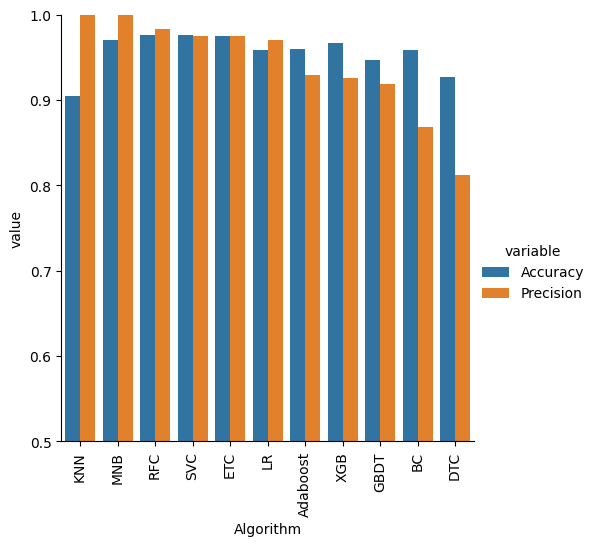

In [85]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model improve
#change the max_feature parameter of tfidf

